# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

##1. Carga y Vista General

In [1]:
# Todas las librerias empleadas en este notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import kagglehub
import time
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
# Carga del conjunto de datos obtenido desde la plataforma Kaggle
path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)
print("Archivos descargados:", os.listdir(path))

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance
Archivos descargados: ['insurance.csv']


In [3]:
# 1. Lectura del dataseet "Insurance"
csv_file = os.path.join(path,"insurance.csv")
df = pd.read_csv(csv_file)

El dataset seleccionado para la realización del estudio estadístico descriptivo contiene información correspondiente a una aseguradora de salud ubicada en Estados Unidos. El conjunto de datos incluye las siguientes variables:


*   Age: edad del beneficiario principal del seguro.
*   Sex: género del contratista del seguro (femeale o male).
*   BMI (Body Mass Index): índice de masa corporal, indicador que permite evaluar si el peso es adecuado en relación con la estatura.
*   Children: número de hijos o dependientes cubiertos por el seguro médico.
*   Smoker: Indica si el beneficiario es fumador o no.
*   Region: área geográfica de residencia del beneficiario dentro de los Estados Unidos.
*   Charges: costos médicos individuales facturados por el seguro de salud.



































In [45]:
df.head(5) ## Visualiza los 5 primeros registros del dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
print(f"El dataset contiene {df.shape[0]} registros y {df.shape[1]} variables")

El dataset contiene 1338 registros y 7 variables


In [35]:
df.info()
## Proporciona información sobre el dataset, incluyendo el tipo de variable,
## el número de valores no nulos y las variables que lo componen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df.isnull().sum()
## El dataset no contiene valores NULL

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [42]:
df.duplicated().any()
print(f"Registros dupliacdos\n {df[df.duplicated()]}")
## Comprobación de registros dupliados

Registros dupliacdos
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [43]:
df = df.drop_duplicates()
## Elimina los registros duplicados


##2. Clasificación de Variables

In [51]:
def variables_dataset(df):
  for col in df.columns:
    if df[col].dtype==object:
      print(f"{col}\n {df[col].unique()}\t{df[col].dtype}\n")
    else:
      print(f"{col}\n {df[col].dtype}\n")

In [52]:
variables_dataset(df)


age
 int64

sex
 ['female' 'male']	object

bmi
 float64

children
 int64

smoker
 ['yes' 'no']	object

region
 ['southwest' 'southeast' 'northwest' 'northeast']	object

charges
 float64



#### El dataset contiene variables numéricas discretas (age, children), variables numéricas continuas (bmi, charges) y variables categóricas (sex, smoker, region).
####Las variables categóricas son de tipo nominal, ya que no presentan un orden natural entre sus categorías.



## 3. Estadísticos Descriptivos

In [ ]:
df.describe().round(2)
## Proporciona un resumen estadístico de las variables numéricas del dataset,
## incluyendo medidas como la media, la mediana, la desviación típica,
## los valores mínimo y máximo, y los percentiles.

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


#### A continuacuón, vamos a analizar de forma aislada cada una de nuestras variables numéricas. Obteniendo una descripción estadistica de cada una de ellas

### Variable analizada: Age (edad del beneficiario)

In [22]:
## Calculo de la media, mediana, varianza, desviación tipica y coeficiente de variación
def estadistica_descriptiva(col):
    if df.dtypes[col] != 'object':
      print(f"Columna: {col}")
      print(f" Media: {df[col].mean():.2f}")
      print(f" Mediana: {df[col].median():.2f}")
      print(f" Varianza: {df[col].var():.2f}")
      print(f" Desviación típica: {df[col].std():.2f}")
      coef_variacion_pct = (df[col].std() / df[col].mean()) * 100
      print(f" Coeficiente de variación: {coef_variacion_pct:.2f}\n")
      print(f" Curtosis: {df[col].kurtosis():.2f}")
      print(f" Asimetria: {df[col].skew():.2f}\n")
    else:
      print(f"Esta {col} no esuna variable numérica")

In [23]:
estadistica_descriptiva("age")

Columna: age
 Media: 39.21
 Mediana: 39.00
 Varianza: 197.40
 Desviación típica: 14.05
 Coeficiente de variación: 35.84

 Curtosis: -1.25
 Asimetria: 0.06



#### Estas medidas permiten obtener una idea general del comportamiento de la variable, incluyendo su forma, homogeneidad y la posible presencia de valores atípicos.


In [ ]:
columna = ["age",'bmi', 'children','charges']

In [24]:
def num_outliers(col):
  ## Detección de outliers
  Q1 = np.percentile(df[col], 25)
  Q3 = np.percentile(df[col], 75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
  print("Número de outliers:", outliers.shape[0])
  return Q1,Q3,limite_inferior,limite_superior



In [25]:
## Visualización del Histograma y box plot
def Visualiza_hist_y_box_plot(col):
  plt.figure(figsize=(10, 8))
  # Histograma
  Q1,Q3,limite_inferior,limite_superior=num_outliers(col)
  plt.subplot(2, 1, 1)
  plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
  plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Media: {df[col].mean():.0f}")
  plt.axvline(df[col].median(), color='green', linestyle='-', label=f"Mediana: {df[col].median():.0f}")
  plt.axvline(Q1, color='black', linestyle='--', label='Q1')
  plt.axvline(Q3, color='black', linestyle='--', label='Q3')
  plt.title(f'Histograma de {col}\nSkewness: {df[col].skew():.2f}, Curtosis: {df[col].kurtosis():.2f}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.legend()

  # Boxplot
  plt.subplot(2, 1, 2)
  plt.boxplot(df[col], vert=True, patch_artist=True,
              showmeans=True, meanline=True,
              boxprops=dict(facecolor='lightgreen', color='green'),
              medianprops=dict(color='red'),
              whiskerprops=dict(color='blue'),
              flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none')
            )
  # Líneas de IQR y límites de outliers
  plt.axhline(Q1, color='purple', linestyle='--', label='Q1')
  plt.axhline(Q3, color='purple', linestyle='--', label='Q3')
  plt.axhline(limite_inferior, color='orange', linestyle=':', label='Limite Inferior')
  plt.axhline(limite_superior, color='orange', linestyle=':', label='Limite Superior')

  plt.title(f'Boxplot de {col} con IQR y Outliers')
  plt.ylabel(col)
  plt.legend()
  plt.tight_layout()
  plt.show()


Número de outliers: 0


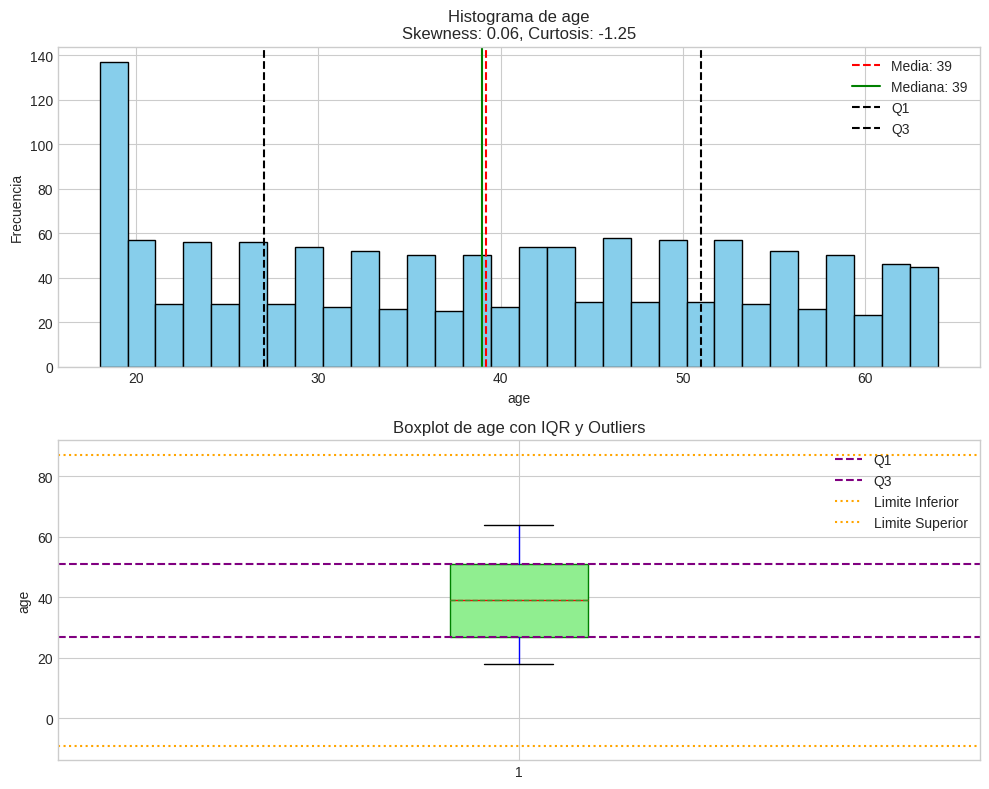

In [26]:
Visualiza_hist_y_box_plot("age")

##

### Análisis y conclusiones obtenidas del comportamiento de la variable


####La variable age presenta una distribución aproximadamente simétrica con una media y mediana iguales (39 años), poca asimetría (skew ≈ 0.06), y una curtosis negativa que indica una distribución más plana que la normal, con un pico bajo y colas ligeras.
####La dispersión es moderada, lo que indica homogeneidad razonable en los datos de edad. las edades se desvían 14 años aproximadamente de la media. Los valores se concentran principalmente entre 27 y 52 años, según el rango intercuartílico (IQR).
####Por último, el boxplot no muestra valores atípicos fuera de los límites, lo que indica ausencia de outliers significativos en la variable.








In [22]:
## Detección de outliers: Z-Score

Z_score = zscore(df[columna[0]])  # df[columna[3]] es la Serie
out=np.abs(Z_score)>3
print(f"Outliers: {out.sum()}")

Outliers: 0


### Variable analizada: Bmi (índice de masa corporal)

In [27]:
estadistica_descriptiva("bmi")

Columna: bmi
 Media: 30.66
 Mediana: 30.40
 Varianza: 37.19
 Desviación típica: 6.10
 Coeficiente de variación: 19.89

 Curtosis: -0.05
 Asimetria: 0.28



Número de outliers: 9


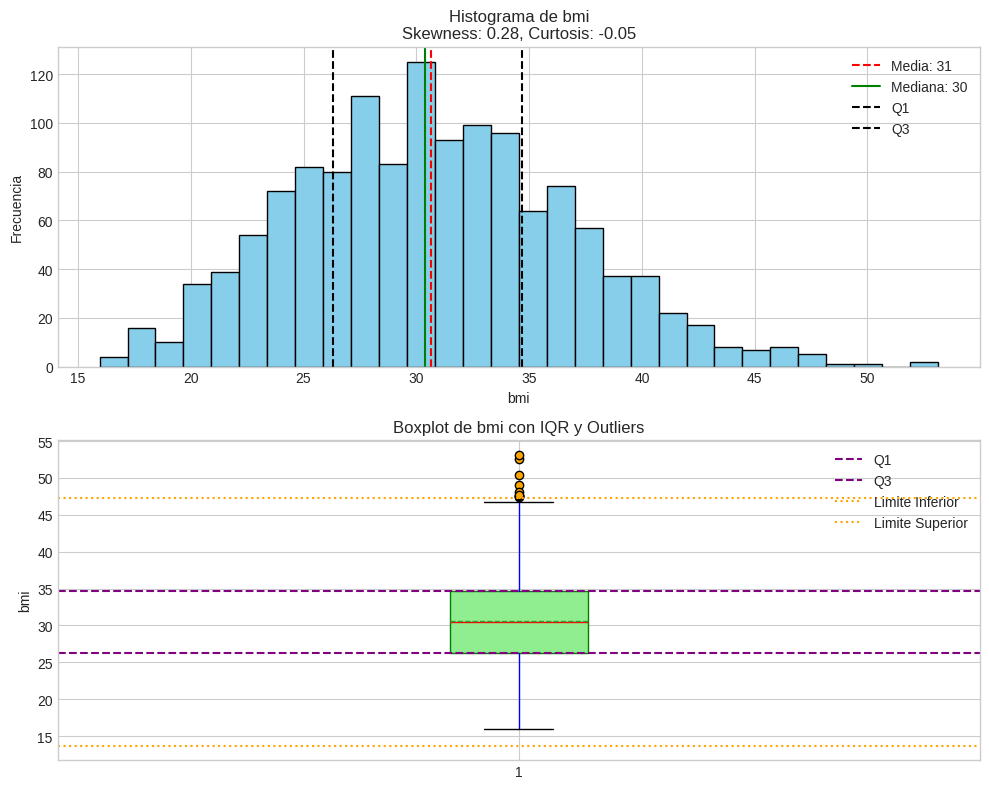

In [28]:
Visualiza_hist_y_box_plot("bmi")

### Análisis y conclusiones obtenidas del comportamiento de la variable
####La variable bmi presenta una distribución con una ligera asimetría positiva, es decir, un leve desplazamiento hacia la derecha. El sesgo positivo es poco pronunciado y la curtosis es muy cercana a cero (curtosis ≈ −0.05), lo que indica una distribución muy similar a la normal, con un pico moderado y colas ligeras.
####La dispersión de los datos es moderada, con una desviación estándar de aproximadamente 6 unidades de índice de masa corporal respecto a la media. La mayor parte de los valores se concentra entre 26 y 35, según el rango intercuartílico (IQR).
####En el boxplot se identifican  9 valores atípicos (outliers) por encima del límite superior, con valores que llegan hasta cerca de 50 o más. Estos outliers podrían representar individuos con sobrepeso u obesidad severa.


In [17]:
# Filtrar outliers
outliers = df[(df[columna[1]] < limite_inferior) | (df[columna[1]] > limite_superior)]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 9


### Variable analizada: Charges (costos médicos por el seguro de salud)

In [29]:
estadistica_descriptiva("charges")

Columna: charges
 Media: 13270.42
 Mediana: 9382.03
 Varianza: 146652372.15
 Desviación típica: 12110.01
 Coeficiente de variación: 91.26

 Curtosis: 1.61
 Asimetria: 1.52



Número de outliers: 139


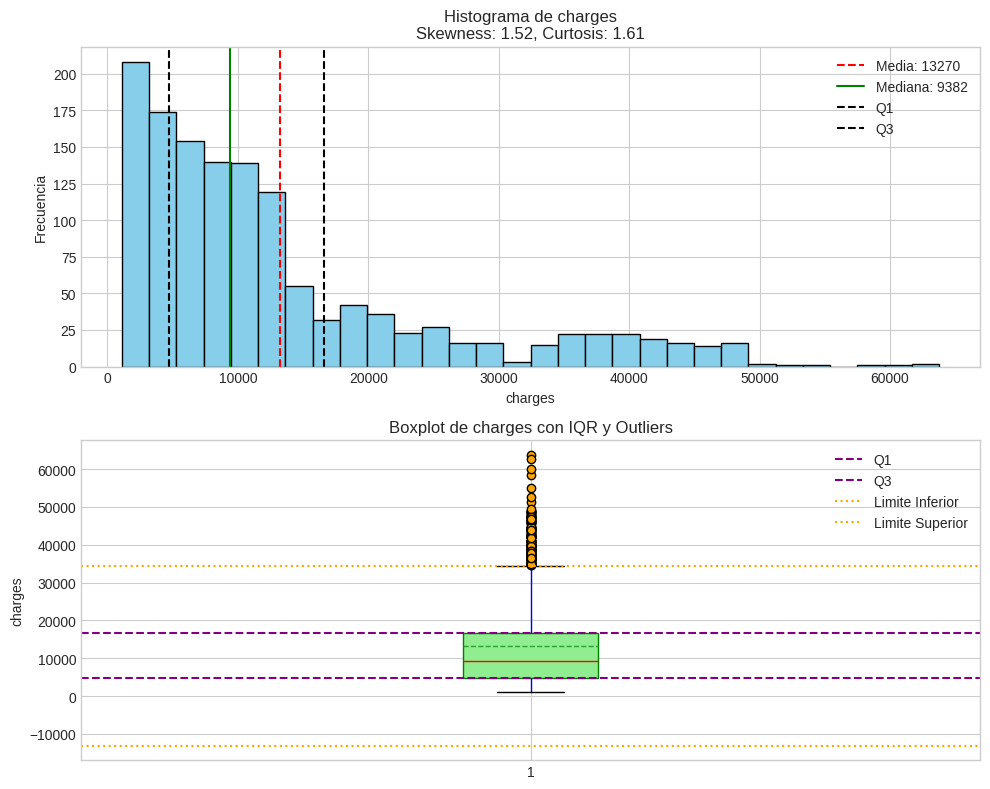

In [30]:
Visualiza_hist_y_box_plot("charges")

### Análisis y conclusiones obtenidas del comportamiento de la variable
####La variable bmi presenta una distribución con una asimetría positiva (skew= 1.52), es decir, un desplazamiento hacia la derecha. y una curtosis positiva (curtosis ≈1.615), lo que indica una distribución con pico muy pronuncionado y unas colas pesadas, especialmente en valores altos de la variable.
####La dispersión de los datos es muy elevada, como refleja el coeficiente de variación del 91.26 %, lo que supone una alta heterogeneidad en los valores observados y confirma que la media no es una medida representativa del comportamiento típico de la variable.
####El boxplot evidencia la presencia de numerosos valores atípicos (n = 139) situados por encima del límite superior, los cuales podrían estar asociados a costes significativamente elevados del seguro médico para determinados individuos.


In [35]:
outliers = df[(df[columna[3]] < limite_inferior) | (df[columna[3]] > limite_superior)]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 139


## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

## 1. Análisis de Correlación

In [4]:
columna = ["age",'bmi', 'children','charges']

In [5]:
corr_matrix = df[columna].corr(method='pearson')
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

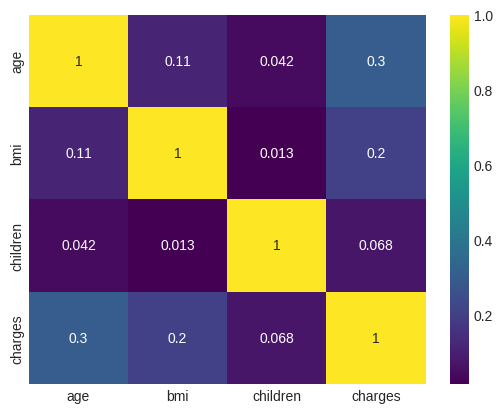

In [6]:
sns.heatmap(corr_matrix, annot=True, cmap="viridis")

#### Charges es La variable objetivo a predecir por el modelo. La matriz de correlación muestra que Age es la variable que mantiene la relación más fuerte con la variable objetivo. (pearson=0.3)

##2. Relaciones Bivariantes

In [5]:
corr_pearson=[]
corr_spearman=[]
for col in ["age","bmi","children"]:
  corr, p_value = pearsonr(df[col], df["charges"])
  corr_pearson.append(corr)
  print("Correlación de Pearson:", corr)
  corr_s, p_value = spearmanr(df[col], df["charges"])
  corr_spearman.append(corr_s)

Correlación de Pearson: 0.29900819333064754
Correlación de Pearson: 0.1983409688336288
Correlación de Pearson: 0.0679982268479048


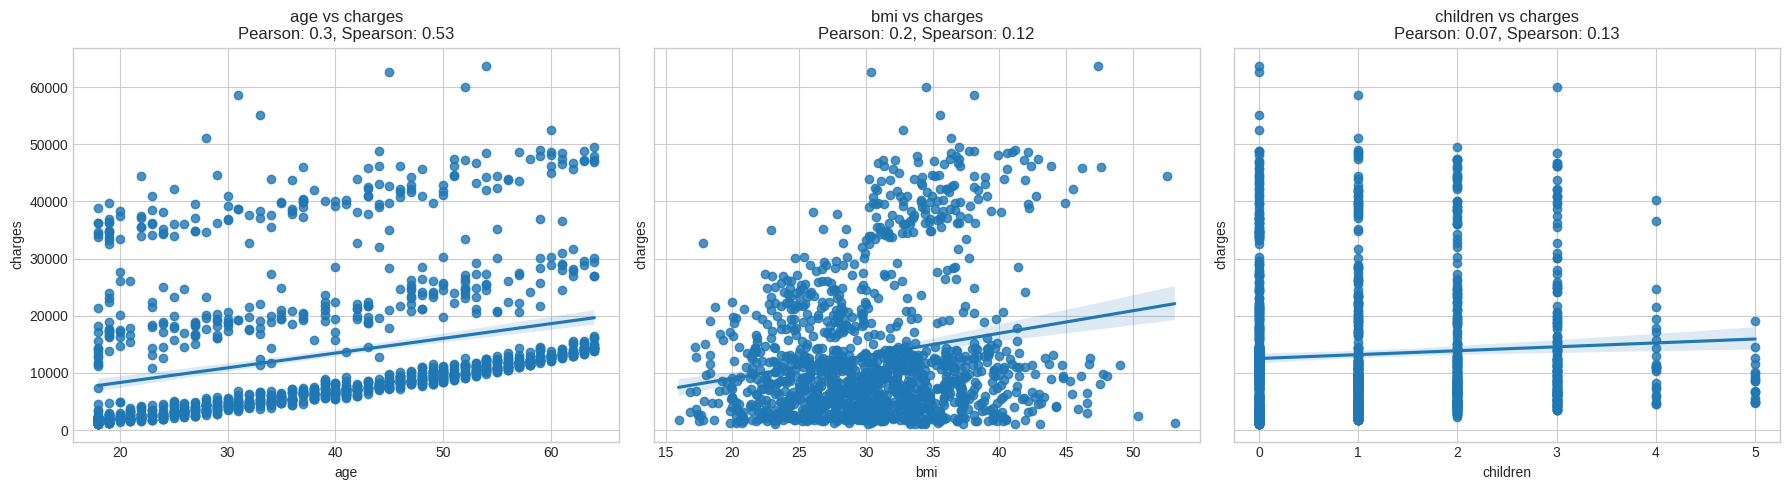

In [8]:
## La target o variable a predecir es Charges. Por medio de scartplot observamos visualmente la relacion
## existente con el resto de variables del dataset
columna = ["age", "bmi", "children", "charges"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.regplot(x=columna[0], y=columna[3], data=df, ax=axes[0])
axes[0].set_title(f'{columna[0]} vs charges\nPearson: {corr_pearson[0].round(2)}, Spearson: {corr_spearman[0].round(2)}')


sns.regplot(x=columna[1], y=columna[3], data=df, ax=axes[1])
axes[1].set_title(f'{columna[1]} vs charges\nPearson: {corr_pearson[1].round(2)}, Spearson: {corr_spearman[1].round(2)}')

sns.regplot(x=columna[2], y=columna[3], data=df, ax=axes[2])
axes[2].set_title(f'{columna[2]} vs charges}\nPearson: {corr_pearson[2].round(2)}, Spearson: {corr_spearman[2].round(2)}')

plt.tight_layout()
plt.show()


#### Observando la comparativa entre las 3 gráficas, existe una relación positiva entre Age y Charges. A medida que aumenta la edad, tienden a aumentar los gastos (charges).


## 2. Reresión lineal

In [26]:
def modelo_regresion_lineal(X_train,y_train,X_test,y_test):
    # ModeloRegresion Lineal
  model = LinearRegression()
  model.fit(X_train, y_train) ## El modelo de regresión lineal se entrena utilizando los datos del conjunto X_train y y_train.
  y_pred = model.predict(X_test) # Predciciones del modelo en el conjunto de prueba
  print(f"Ecuación de la recta de regreción lineal\n\ty = {model.coef_[0].round(2)}*X + {model.intercept_.round(2)}")
  mse = mean_squared_error(y_test, y_pred)
  print("Rendimiento del modelo:")
  print(f"\tError Cuadratico Medio: {mse:.2f}")
  r2 = r2_score(y_test, y_pred)
  print(f"\tCoeficiente de determinación R²: {r2:.2f}")



In [5]:
# Predecir target ("charges") tomando como variable independeiente: "Age"
X = df[['age']]
y = df['charges']      # variable objetivo

# Spilt del conjunto de datos: 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
modelo_regresion_lineal(X_train,y_train,X_test,y_test)

Ecuación de la recta de regreción lineal
	y = 240.6*X + 3876.93
Error cuadrático medio: 135983957.4805469
Coeficiente de determinación R²: 0.12408973539501944


####El modelo presenta un rendimiento muy pobre para predecir costos (charges) cuando recibe unicamente como variable de entrada la edad (Age).  
####La edad, por sí sola, no es suficiente para explicar la variabilidad de los costos


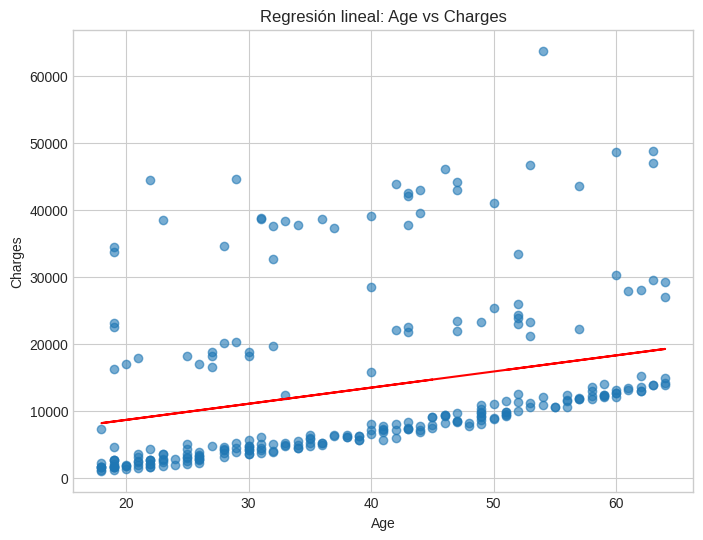

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.6)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Regresión lineal:\n Age vs Charges')
plt.show()

### Regresion lineal multiple

In [7]:
## Trasnformación categórica a numerica. Los algoritmos ML sólo operan con valores numéricos
df.loc[df["sex"] == "female", "sex"] = 0
df.loc[df["sex"] == "male", "sex"] = 1
df.loc[df["smoker"] == "yes", "smoker"] = 0
df.loc[df["smoker"] == "no", "smoker"] = 1
df["sex"]=df["sex"].astype(int)
df["smoker"]=df["smoker"].astype(int)

In [8]:
## Se añaden mas variables de entrada para mejorar el rendimeinto del modelo en predecir la variable "charges"
X = df[['age', 'bmi', 'children',"sex", "smoker"]]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train) ## El modelo de regresión lineal se entrena utilizando los datos del conjunto X_train y y_train.
y_pred = model.predict(X_test) # Predciciones del modelo en el conjunto de prueba

In [37]:
# Coeficientes
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Recta regreción lineal multidimensional \n\ty={model.coef_[0].round(2)}*X[age] + {model.coef_[1].round(2)}*X[bmi] + {model.coef_[2].round(2)}*X[children] + {model.coef_[3].round(2)}*X[sex] + {model.coef_[4].round(2)}*X[smoker] + {model.intercept_.round(2)}")

age: 257.07
bmi: 327.53
children: 427.25
sex: -7.95
smoker: -23653.90
Intercepto: 11540.45
Recta regreción lineal multidimensional 
	y=257.07*X[age] + 327.53*X[bmi] + 427.25*X[children] + -7.95*X[sex] + -23653.9*X[smoker] + 11540.45


In [38]:
print("Rendimiento del modelo:")
mse = mean_squared_error(y_test, y_pred)
print(f"\tError Cuadratico Medio: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"\tCoeficiente de determinación R²: {r2:.2f}")

Rendimiento del modelo:
	Error Cuadratico Medio: 33979257.05
	Coeficiente de determinación R²: 0.78


####En comparación con el modelo de regresión lineal simple, el modelo de regresión lineal múltiple presenta un rendimiento significativamente superior. El coeficiente de determinación aumenta de aproximadamente 0.12 a 0.78, lo que indica una mayor capacidad explicativa, mientras que el error cuadrático medio se reduce de forma considerable de 135983957.48 a 33979257.05

### Regresión logistica

###### La regresión logistica se emplean en problemas de clasificación, dónde la variable a predecir es una clase o categoría

In [39]:
X = df[['age', 'bmi','sex', 'children','charges']]
y = df['smoker'] ##Variable categorica a clasificar

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
def modelo_regresion_logistica(X_train,y_train,X_test,y_test):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred



In [42]:
y_pred= modelo_regresion_logistica(X_train,y_train,X_test,y_test)
matriz = confusion_matrix(y_test, y_pred)
print(matriz)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[ 49   5]
 [  6 208]]
Accuracy: 0.9589552238805971


####El modelo de regresión logística presenta un rendimiento muy alto en la clasificación de la variable Smoker a partir de los datos de entrada. Alcanza una precisión del 95,8 % en el conjunto de test, lo que indica una excelente capacidad de acierto. El modelo es capaz de aprender las relaciones existentes entre las variables independientes y la variable objetivo, consiguiendo generalizar el conocimiento aprendido a nuevos datos datos.

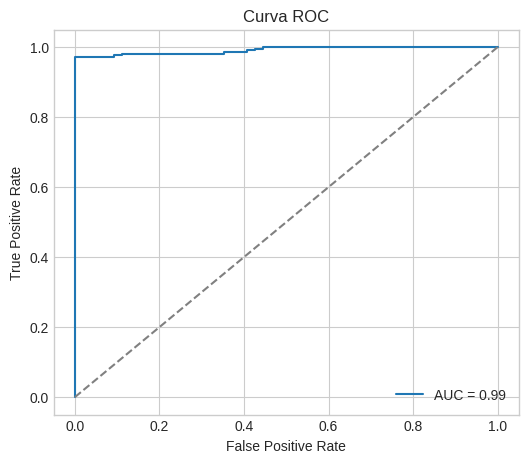

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 4.07
Pendiente estimada: 2.86
Ecuación de la recta de regreción 
	y=2.86*X + 4.07


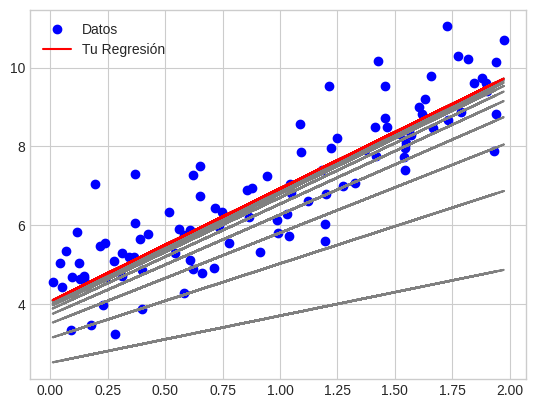

In [44]:
# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    #Generacion aleatoria de parametros (numpy)
    w = np.random.randn()
    b = np.random.randn()

    for i in range(1, iteraciones):
        # calcular el error
        y_pred= w*X + b
        residuo = y_pred-y

        #Ajustar parametros
        n = len(X)
        dw = (2/n) * np.sum(X * residuo)
        db = (2/n) * np.sum(residuo)

        w = w - eta * dw
        b = b - eta * db

        #pintar recta

        pintar_recta(b, w, X, y)

    return b, w


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')

## Split del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_mock, y_mock, test_size=0.2, random_state=42
)
# Probemos tu función
b, w = evolve_linear_regression(X_train, y_train)
print(f"Intercepto estimado: {b:.2f}")
print(f"Pendiente estimada: {w:.2f}")
print(f"Ecuación de la recta de regreción \n\ty={w.round(2)}*X + {b.round(2)}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

## Error Cuadratico Medio

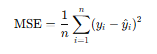

In [45]:
## Estimar el error cometido del modelo en el conjunto de test
y_pred= w*X_test + b
n = len(y_test)
mse = (1/n) * np.sum((y_test - y_pred) ** 2)
print("MSE:", mse)

MSE: 0.6673677267230593


### Coeficiente de determinación (R²)

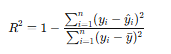

In [46]:
## Coeficiente de determinación R²
y_mean = np.mean(y_test)
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)
r2 = 1 - (ss_res / ss_tot)
print("R²:", r2)

R²: 0.8031748301993898


### Metodo LinearRegression de Scikit-Learn

In [47]:
modelo_regresion_lineal(X_train,y_train,X_test,y_test)

Ecuación de la recta de regreción lineal
	y = [2.8]*X + [4.14]
Rendimiento del modelo:
	Error Cuadratico Medio: 0.65
	Coeficiente de determinación R²: 0.81


#### No existe una diferencia significativa en los resultados obtenidos al emplear la función LinearRegression() o al calcular manualmente la recta de regresión mediante el método de gradiente descendente. Ambos métodos convergen a valores muy similares para los coeficientes de la recta de regresión. Sin embargo, a diferencia del gradiente descendente, LinearRegression() no requiere el ajuste de una tasa de aprendizaje, lo que simplifica su uso y evita problemas de convergencia para encontrar el error mínimo

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
ts_df.shape

(730, 1)

In [25]:
ts_df.head()

,Sales
2020-01-01,9.470686
2020-01-02,15.839721
2020-01-03,12.049692
2020-01-04,9.482199
2020-01-05,9.451660


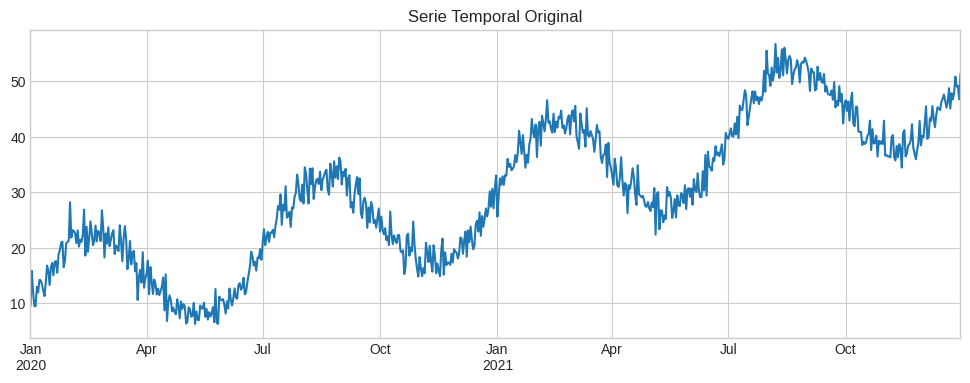

/tmp/ipython-input-1814969082.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ts_df['Sales'].resample('M').mean()


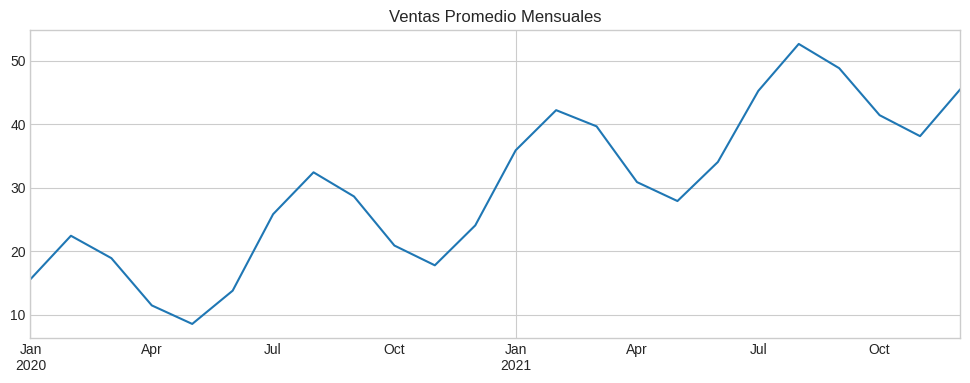

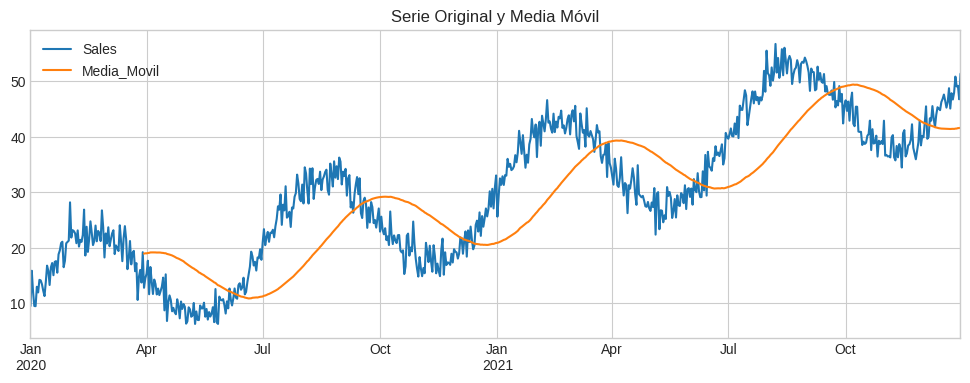

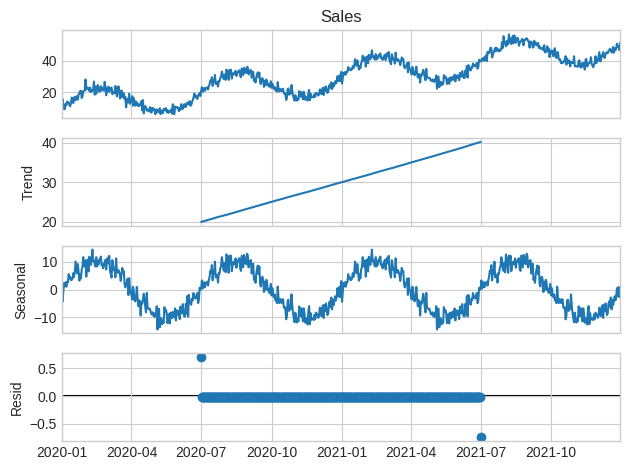

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ts_df['Sales'].resample('M').mean()

monthly_sales.plot(title='Ventas Promedio Mensuales', figsize=(12,4))
plt.show()


# 3. Media Móvil

ts_df['Media_Movil'] = ts_df['Sales'].rolling(window=90).mean()

ts_df[['Sales', 'Media_Movil']].plot(
    title='Serie Original y Media Móvil',
    figsize=(12,4)
)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    ts_df['Sales'],
    model='additive',
    period=365 ## la estacionalidad es anual
)

result.plot()
plt.show()



#### La serie temporal presenta una tendencia positiva, mostrando un aumento gradual en las ventas a lo largo del tiempo. Además, las ventas siguen un patrón que se repite de forma anual..